In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('sample_sales_data.csv',index_col=0)
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


__There are total 7829 records with 9 columns__
* __Looking at the output of the .info() method, we can intepret each column as follows:__

    * transaction_id = this is a unique ID that is assigned to each transaction
    * timestamp = this is the datetime at which the transaction was made
    * product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
    * category = this is the category that the product is contained within
    * customer_type = this is the type of customer that made the transaction
    * unit_price = the price that 1 unit of this item sells for
    * quantity = the number of units sold for this product within this transaction
    * total = the total amount payable by the customer
    * payment_type = the payment method used by the customer
    It is also interesting to look at the datatypes. We can see that there are 3 different datatypes within this dataset:

    * object = this column contains categorical values
    * object = this column contains categorical values
    * float64 = this column contains floating point numerical values (i.e. decimal numbers)
    * int64 = this column contains integer values (whole numbers)

In [45]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

* __NO NULL VALUES__

In [7]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


__We can see that__
* Mean unit price is 7.81 and mean quantity is 2. Average total goes to 19.7
* Maximum quantity bought is 4 whereas maximum unit price of an item goes upto 23.99

__Lets divide into numerical features and categorical features__

In [50]:
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
num_features

['timestamp', 'unit_price', 'quantity', 'total']

__We dont really need to consider transaction_id and product_id and we will change timestamp dtype__

In [51]:
cat_features = [feature for feature in df.columns if feature not in num_features and feature not in('transaction_id','product_id')]
cat_features

['category', 'customer_type', 'payment_type']

In [52]:
for col in cat_features[-3:]:
    print(f"The unique values for {col} are : {df[col].unique()}")

The unique values for category are : ['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']
The unique values for customer_type are : ['gold' 'standard' 'premium' 'basic' 'non-member']
The unique values for payment_type are : ['e-wallet' 'debit card' 'cash' 'credit card']


# 2. Visualization

### 2.1 Numerical Visuals

In [53]:
num_features

['timestamp', 'unit_price', 'quantity', 'total']

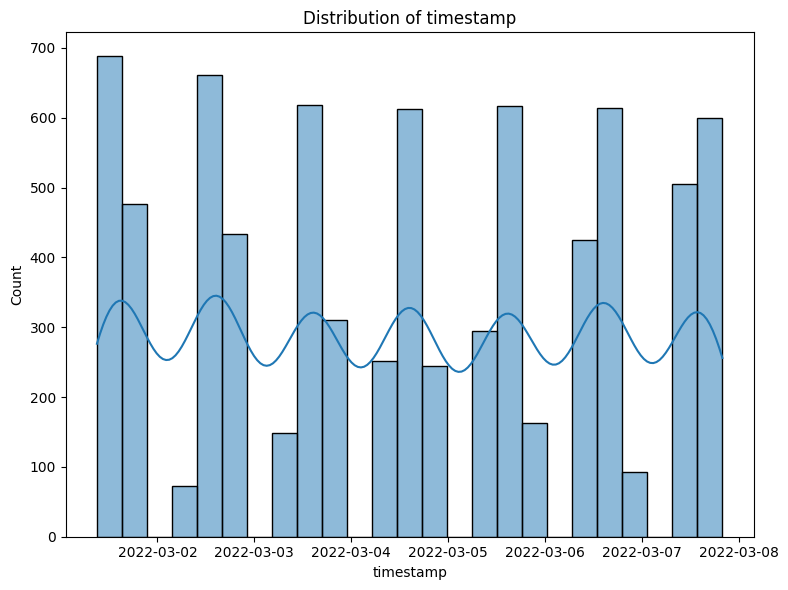

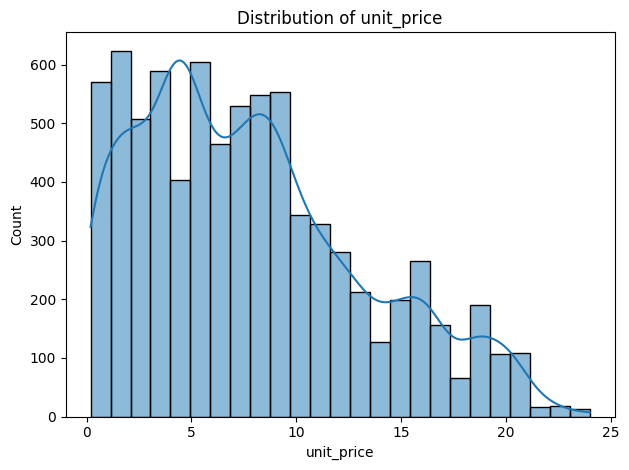

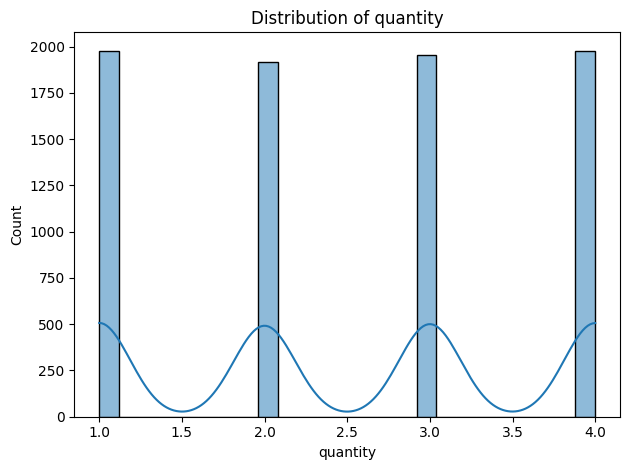

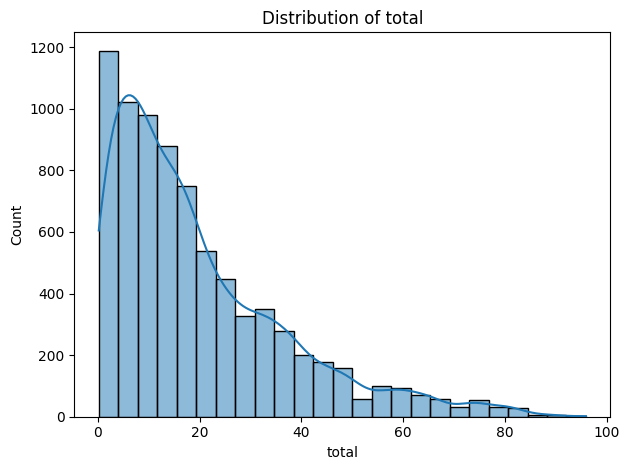

In [104]:
plt.figure(figsize=(8,6))
for col in num_features:
    sns.histplot(x=col,data=df,kde=True,bins=25)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

## Insights:
* Timestamp distribution shows a cyclic nature for everyday which might indicate that at particular time of the day there are more customers.
* As the unit price increases, the sale decreases. This shows that low unit price items are more in demand. In general sense, there are basic utility items like soap,toothpaste,water bottle,etc as shis makes sense, you would expect a grocery store to sell more products that are cheap, and just a few products that are really expensive.
* Similar case is with total column, low total items are more in demand. One way to interpret this is that people are buying more of low unit price items. We can check that with scatter plot.
* Quantity sold is consistent

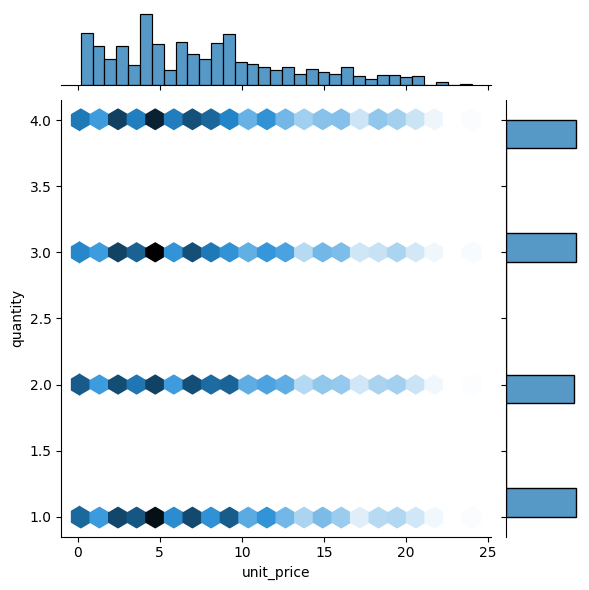

In [93]:
sns.jointplot(data=df, x='unit_price', y='quantity',kind='hex',)

__As we can see, for all unique quantities, low unit price items were sold the most. Darker the spot, more the sold items__

### 2.2 Categorical Visuals

In [95]:
cat_features

['category', 'customer_type', 'payment_type']

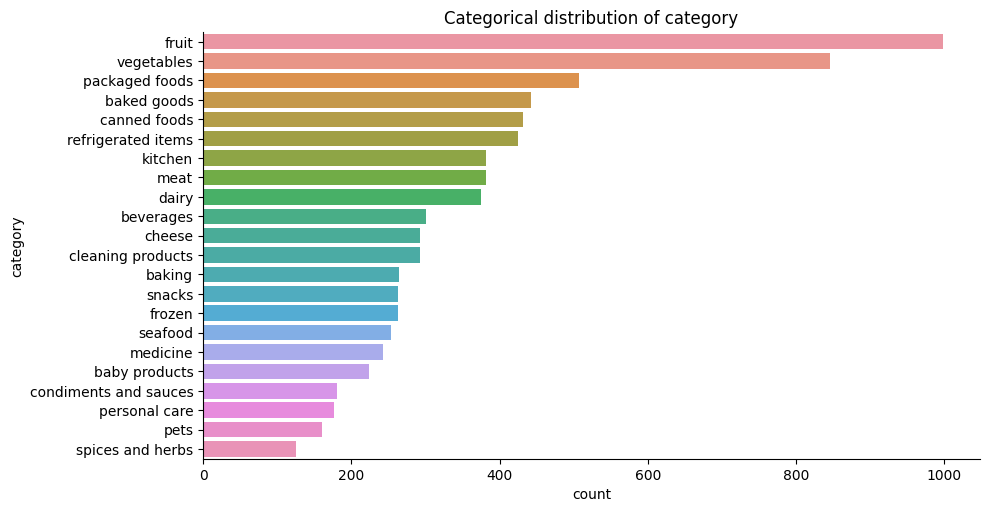

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


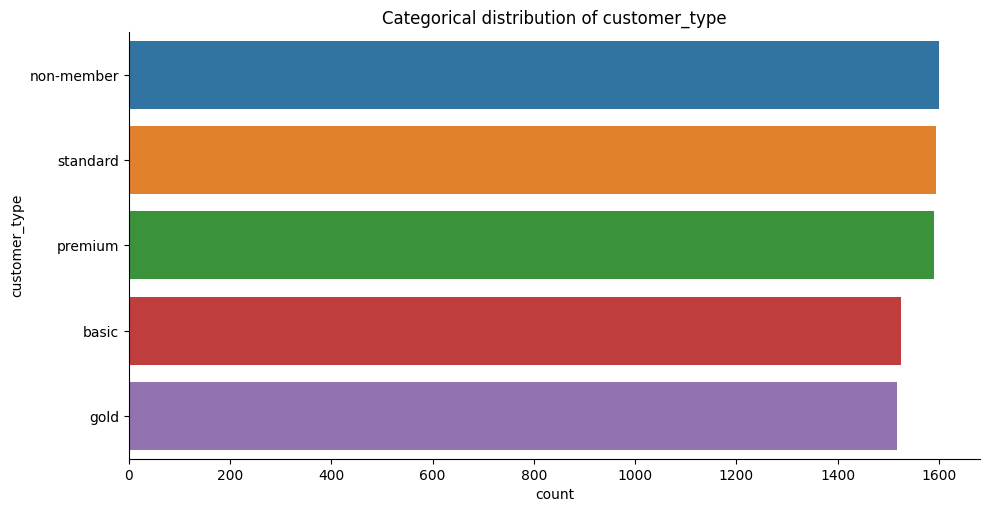

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


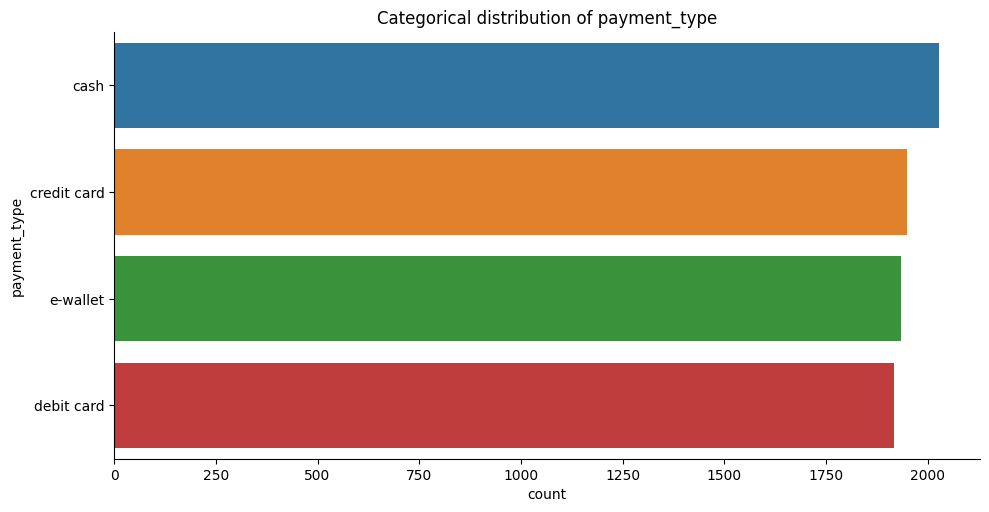

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


In [130]:

for col in cat_features:
    sns.catplot(data = df, y = col, kind='count',height=5,aspect=2, order = df[col].value_counts().index)
    plt.title(f"Categorical distribution of {col}")
    plt.xticks(rotation=0)
    plt.show()
    print(df[col].value_counts())

## Insights:
* Food, vegetables and packaged foods are top 3 most sold categories where as Spice/Herbs, Pets and personal care are bottom 3 products.
* In customer type, on a large scale you can say that all are equivalent between 1500 to 1600 counts but to be specific, non-member is the highest closely followed by standard and premium.
* Cash is the most used payment type.

# 3. Lets handle timestamp column

In [132]:
df['timestamp']

0      2022-03-02 09:51:38
1      2022-03-06 10:33:59
2      2022-03-04 17:20:21
3      2022-03-02 17:23:58
4      2022-03-05 14:32:43
               ...        
7824   2022-03-03 18:22:09
7825   2022-03-04 19:14:46
7826   2022-03-03 14:00:09
7827   2022-03-04 15:11:38
7828   2022-03-06 13:50:36
Name: timestamp, Length: 7829, dtype: datetime64[ns]

In [135]:
df['timestamp'].min() , df['timestamp'].max()

(Timestamp('2022-03-01 09:00:13'), Timestamp('2022-03-07 19:59:54'))

* __So the dataset is of prodcts sold between 1st March 2022 till 7th march 2022__

Lets exctract hour from time

In [137]:
df['hour'] = df['timestamp'].dt.hour

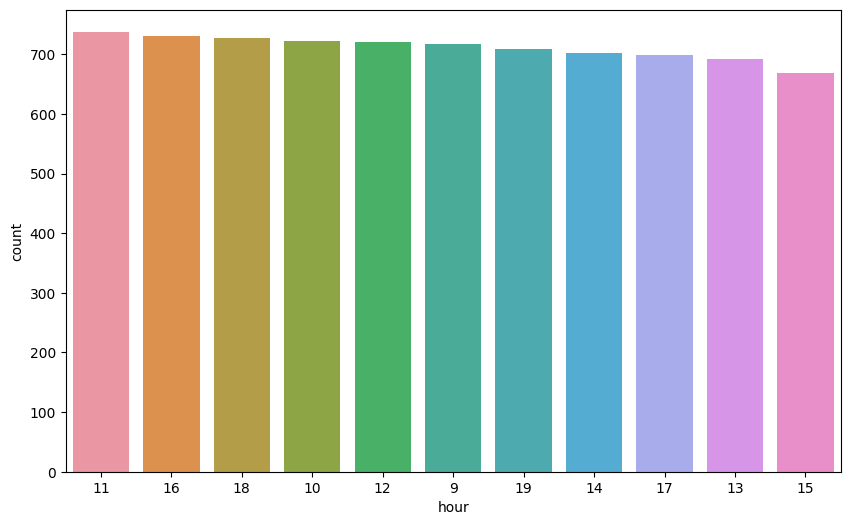

In [151]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='hour',order=df['hour'].value_counts().index)
plt.show()

### Insight:
* We can see that, from the data of one week, 11th, 16th and 18th hour of the day are the top 3 hours of the day for transactions being processed. This is interesting, this would suggest that their busiest times of day may be just before lunch, and in the evening as people are on the way home from work. Once again, this is a small sample of data, so we can't make assumptions on the population sample of data, but it gives us insights to go back to the business with.

# 4. Correlation

C:\Users\Swamesh\AppData\Local\Temp\ipykernel_2720\2846048372.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


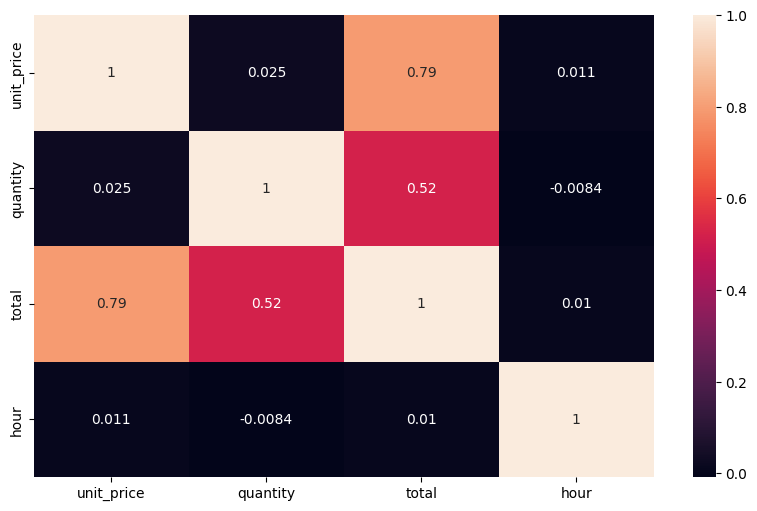

In [152]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True)
plt.show()

### Strong correlation between total and unit price is obvious, other than that not much important information between other columns.